In [1]:
from tools.data import get_datasets
train, test = get_datasets()

Reading data file


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.neighbors import KNeighborsClassifier

## Filtre de Butterworth

In [3]:
# Fonction permettant d'afficher les graphiques des signaux filtrés à l'aide d'un filtre de Butterworth

def butterworth_plot(dataset, n):
    Wn = [('lowpass', 0.035) , ('bandpass', (0.035,0.07)) , ('bandpass', (0.07, 0.113)), ('bandpass', (0.113, 0.26)), ('highpass', 0.26)]
    butter = np.zeros((dataset.shape[0], 20))
    length = dataset[n,0]
    current = []
    plt.figure(figsize=(10, 5))
    plt.plot(dataset[n, 1:1+length])
    plt.plot(dataset[n, 1+512:1+512+length])
    plt.plot(dataset[n, 1+512*2:1+512*2+length])
    plt.plot(dataset[n, 1+512*3:1+512*3+length])
    for filter_type, value in Wn :
        b, a = signal.butter(5, value, filter_type)
        plt.figure(figsize=(10, 5))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1:1+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512:1+512+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512*2:1+512*2+length]))
        plt.plot(signal.filtfilt(b, a, dataset[n, 1+512*3:1+512*3+length]))
        plt.show()

In [4]:
# Fonction permettant d'extraire la puissance des signaux issus du filtre du Butterworth

def butterworth_filter(dataset):
    Wn = [('lowpass', 0.035) , ('bandpass', (0.035,0.07)) , ('bandpass', (0.07, 0.113)), ('bandpass', (0.113, 0.26)), ('highpass', 0.26)]
    butter = np.zeros((dataset.shape[0], 20))
    for i in range(dataset.shape[0]) :
        length = dataset[i,0]
        current = []
        for filter_type, value in Wn :
            b, a = signal.butter(5, value, filter_type)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1:1+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512:1+512+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512*2:1+512*2+length]))**2)/length)
            current.append((np.sum(signal.filtfilt(b, a, dataset[i, 1+512*3:1+512*3+length]))**2)/length)
        butter[i] = np.array(current)
    return butter

## Classification multiclasse

In [5]:
# Classification multiclasse

train_std_mult = butterworth_filter(train)
test_std_mult = butterworth_filter(test)

/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [6]:
# On entraine un k-ppv pour différentes valeurs de k

for n in range(10, 100):
    # train set
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(train_std_mult, train[:,-1])

    # test set
    total_correct = 0
    for i in range(test_std_mult.shape[0]):
        if neigh.predict(test_std_mult[i])[0] == test[i,-1]:
            total_correct += 1

    print 'Pourcentage correct %d:' % n, float(total_correct) / test_std_mult.shape[0] * 100

Pourcentage correct 10: 28.8172630429
Pourcentage correct 11: 28.9993626514
Pourcentage correct 12: 28.862787945
Pourcentage correct 13: 29.0448875535
Pourcentage correct 14: 29.0813074752
Pourcentage correct 15: 29.1450423382
Pourcentage correct 16: 29.1814622599
Pourcentage correct 17: 29.2543021033
Pourcentage correct 18: 29.2634070837
Pourcentage correct 19: 29.2816170445
Pourcentage correct 20: 29.226987162
Pourcentage correct 21: 29.3544568879
Pourcentage correct 22: 29.4181917509
Pourcentage correct 23: 29.5365564964
Pourcentage correct 24: 29.4546116726
Pourcentage correct 25: 29.3817718292
Pourcentage correct 26: 29.3089319858
Pourcentage correct 27: 29.3544568879
Pourcentage correct 28: 29.3362469271
Pourcentage correct 29: 29.4728216334
Pourcentage correct 30: 29.5911863789
Pourcentage correct 31: 29.5729764181
Pourcentage correct 32: 29.6640262223
Pourcentage correct 33: 29.6549212419
Pourcentage correct 34: 29.7823909679
Pourcentage correct 35: 29.7550760266
Pourcentage co

Meilleur résultat k = 36 : 29.8461258

## Classification Binaire

In [7]:
# Classification -1 vs >=0
# on prépare les données:
# tout ce qui est un chiffre -> 1
# tout ce qui est du bruit -> 0

train[train[:,-1] >= 0,-1] =  0
test[test[:,-1] >= 0,-1] =  0

train[:,-1] = train[:,-1] + 1
test[:,-1] = test[:,-1] + 1

In [8]:
# Classification binaire

train_std_bin = butterworth_filter(train)
test_std_bin = butterworth_filter(test)

/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
# On entraine un k-ppv pour différentes valeurs de k

for n in range(10, 100):
    # train set
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(train_std_bin, train[:,-1])

    # test set
    total_correct = 0
    for i in range(test_std_bin.shape[0]):
        if neigh.predict(test_std_bin[i])[0] == test[i,-1]:
            total_correct += 1

    print 'Pourcentage correct %d:' % n, float(total_correct) / test_std_bin.shape[0] * 100

Pourcentage correct 10: 87.617226623
Pourcentage correct 11: 87.5717017208
Pourcentage correct 12: 87.5625967404
Pourcentage correct 13: 87.5899116817
Pourcentage correct 14: 87.6627515251
Pourcentage correct 15: 87.6081216425
Pourcentage correct 16: 87.6263316034
Pourcentage correct 17: 87.3713921515
Pourcentage correct 18: 87.4806519166
Pourcentage correct 19: 87.3896021124
Pourcentage correct 20: 87.5625967404
Pourcentage correct 21: 87.3896021124
Pourcentage correct 22: 87.4806519166
Pourcentage correct 23: 87.489756897
Pourcentage correct 24: 87.6536465447
Pourcentage correct 25: 87.4351270145
Pourcentage correct 26: 87.5808067013
Pourcentage correct 27: 87.3987070928
Pourcentage correct 28: 87.4806519166
Pourcentage correct 29: 87.4806519166
Pourcentage correct 30: 87.5443867796
Pourcentage correct 31: 87.3440772102
Pourcentage correct 32: 87.3076572885
Pourcentage correct 33: 87.189292543
Pourcentage correct 34: 87.2712373668
Pourcentage correct 35: 87.1255576801
Pourcentage cor

Meilleur résultat 24: 87.6536465447

## Affichage Butterworth

/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Marc/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarni

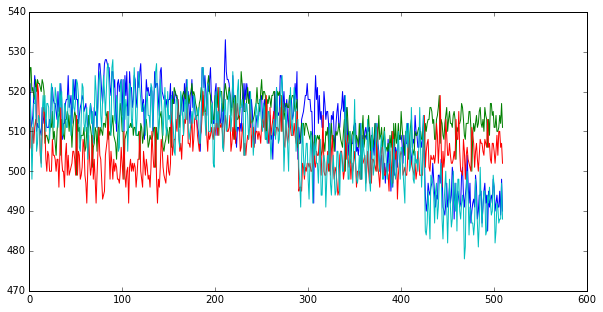

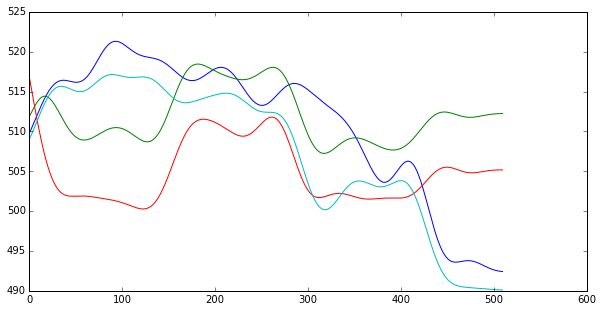

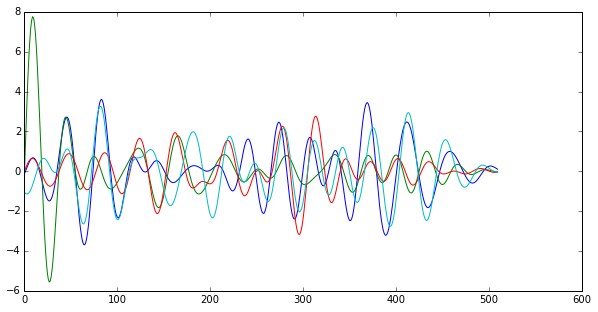

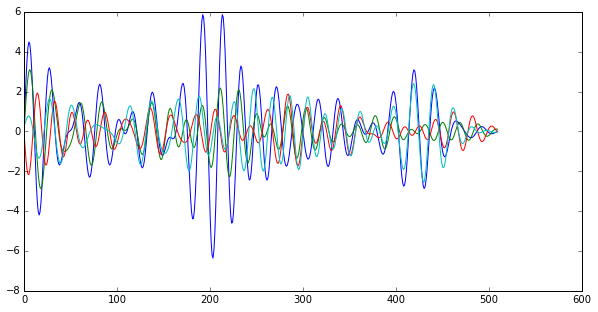

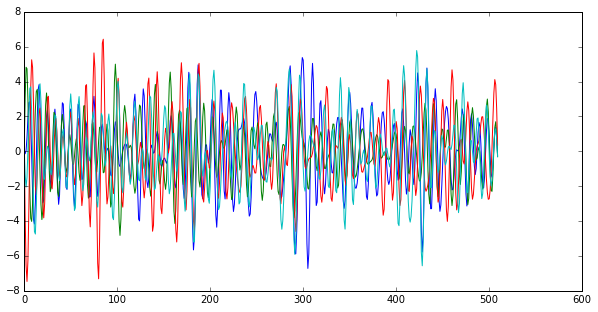

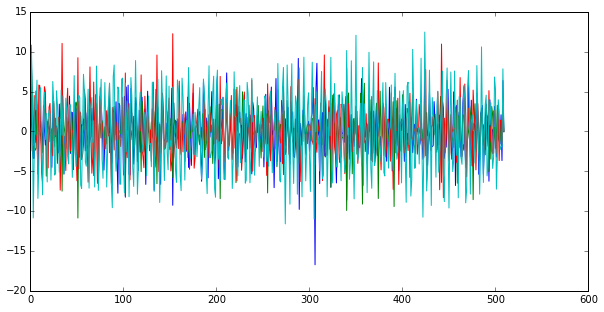

In [10]:
# Affichage des graphiques des signaux filtrés avec Butterworth, extrait 24

butterworth_plot(train, 24)